   <h1><center>Machine Learning, Topics 4<br><br><font color=' Blue '> How does Supervised Learning LEARN?</font><br><font color=' Green '> Linear Regression </font><br><font color=' purple '> Gradient Descent Illustrated</font><center></h1>
      <h4><center><i>Larry Huang, Jeffrey Huang</i></center></h4><center><img src="http://www.wavelf.org/static/media/logo%20with%20type%20(1).2890ea1c.svg" width=350 height=20/>
   

 



<h1><center><font color='red'>  ***PLEASE MAKE A COPY OF THIS DOCUMENT SO YOU CAN EDIT IT!*** <center></h1>

---



# <font color='purple'>Gradient Descent Illustrated</font><font color='green'>(Math/Implementation not required)</font>

## Supervised Machine Learning

<table border="2"><tr>
<td> <img src="http://lj-studios.com/big_data_club/decision_tree/model_simple_learn.png" style="width: 200px;"/> </td>
<td> <img src="http://lj-studios.com/big_data_club/decision_tree/ML_diagram.png" style="width: 400px;"/> </td>
</tr></table>


## How does Machine Learning LEARN a linear regression model?

The learning is achieved via gradient descent optimization.  The same method is used in other machine learning and deep learning models, for example, Neural Networks.
<br><br>
In this notebook, we will implement our own linear regression model and see the "LEARNING" process alive.

### Quick review of Gradient Descent again


The Algorithm of searching for minimum of Cost Function is called **Gradient Descent**.  It is an optimization technique to find local optimum.
<br><br>***Optional*** The word, "Gradient", is related to Calculus.  If/when you learn Calculus, you will learn that derivative is the best way to find local minimum or local maximum.  Gradient is a multi-variable generalization of the derivative.
<br><br>
**Ignore** the derivative signs below if you have yet to learn Calculus.  We will explain Backpropagation when we discuss Neural Network Models.
<br><br>
![alt text](https://image.slidesharecdn.com/seminar-160314065246/95/intro-to-deep-learning-autoencoders-15-638.jpg?cb=1457940886)

<b>If you are interested in how to re-create ML algorithms (and to create your own), that's great!
  <br>
  Please take the courses: Calculus, Linear Algebra/Multivariate Calculus.
</b>
<br><br>
Here we only illustrate the simplest case.  The ideas, thought, are the same.

### Math implementation (not required)

### Generate data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


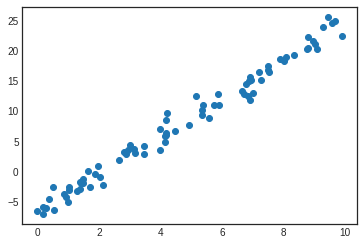

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
plt.style.context('seaborn-white')

import seaborn as sns; 

import numpy as np

# Generate simulated data
rng = np.random.RandomState(1)

x = 10 * rng.rand(80)
X=np.expand_dims(x, axis=1)

y = 3 * x - 6 + rng.randn(80)- rng.randn(80)
y=np.expand_dims(y, axis=1)

plt.scatter(X, y);

###Normalize Data

sc_x scale=2.960, mean=4.663
sc_y scale=9.299, mean=7.930


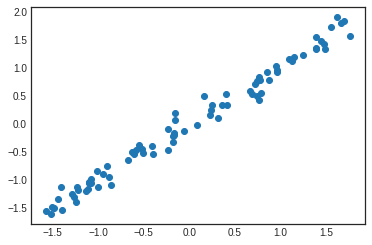

In [ ]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

plt.scatter(X_std, y_std);

print('sc_x scale={:.03f}, mean={:.03f}'.format(sc_x.scale_[0], sc_x.mean_[0]))
print('sc_y scale={:.03f}, mean={:.03f}'.format(sc_y.scale_[0], sc_y.mean_[0]))

### Cost Function


Assuming the linear model is $$y_i = mx_i + b$$
where m is the slope and b is the intercept.
<br><br>
<img src="https://miro.medium.com/max/1400/1*uoGLR9T-6_1hIlPhu2d_rg.png" height="300" width="500"/>
<br><br>
The residual is $$residuals = y_i-(mx_i+b)$$
<br>The cost function (or error function, objective function) is $$cost = \frac{1}{N}\sum_{i=1}^{N}(y_i-(mx_i+b))^2$$


### Gradient



<img src="https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png"/>

In [ ]:
def gradient(X, residuals):
    N = X.shape[0]
    gradient_slope = 0.0
    for i in range(N):
      gradient_slope += (2/N)*(-1)*X[i][0]*residuals[i][0]
    return ( gradient_slope, (2/N)*(-1)* residuals.sum() )

### Gradient Descent

In [ ]:
class LinearRegressionGradientDescent(object):

    def __init__(self, step=0.2):
        self.step_ = step
        
    def fit(self, X, y):
        # X is a Nx1 vector, y is a Nx1 vector
        self.N_ = X.shape[0]
        self.m_ = 0.0
        self.b_ = 0.0
        self.cost_ = [1]
        self.hist_m_ = [self.m_]
        self.hist_b_ = [self.b_]
        delta_m = 1000.0
        delta_b = 1000.0
        coefficent_threshold = 0.0001
        
        while delta_m > coefficent_threshold or delta_b > coefficent_threshold:
            prediction = self.predict(X)
            residuals = y - prediction
            
            grad = gradient(X, residuals)
            # gradient descent: learning data to get new coeffients (new model)
            self.m_ -= self.step_ * grad[0]
            self.b_ -= self.step_ * grad[1]
            
            cost = (residuals**2).sum() / self.N_
            delta_m = abs(self.m_ - self.hist_m_[-1])
            delta_b = abs(self.b_ - self.hist_b_[-1])
            self.cost_.append(cost)
            self.hist_m_.append(self.m_)
            self.hist_b_.append(self.b_)
        return self

    def predict(self, X):
        return X * self.m_ + self.b_


### Run homemade Linear Regression model

In [ ]:
# start the gradient descent
lr = LinearRegressionGradientDescent()
lr.fit(X_std, y_std)
print('Final slope is '+str(lr.m_))
print('Final intercept is '+str(lr.b_))

Final slope is 0.9910470323927953
Final intercept is 9.076073226310656e-17


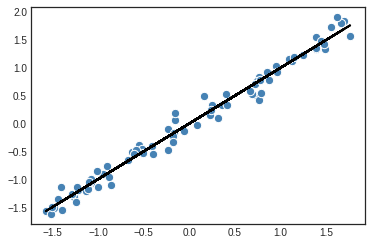

In [ ]:
plt.scatter(X_std, y_std, c='steelblue', edgecolor='white', s=70)
plt.plot(X_std, lr.predict(X_std), color='black', lw=2)    
    
plt.show()

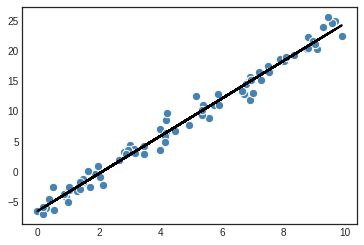

In [ ]:
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X, lr.predict((X-sc_x.mean_[0])/sc_x.scale_[0])*sc_y.scale_[0]+sc_y.mean_[0], color='black', lw=2)    
#plt.plot(X, lr.predict(X_std)*sc_y.scale_[0]+sc_y.mean_[0], color='black', lw=2)

plt.show()

### Illustration of the reduction of Cost Function

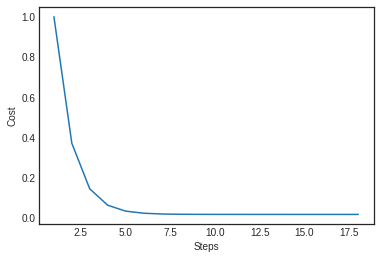

In [ ]:
# plot the cost for each iteration
plt.plot(range(1,len(lr.cost_)), lr.cost_[1:])
plt.ylabel('Cost')
plt.xlabel('Steps')
plt.show()



### Detail code (Optional)

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
plt.close()
ax.set_xlim(( -1.8, 2.2))
ax.set_ylim((-1.8, 2.2))
ax.set_title(" \n \n~~~ Wave Learning ~~~ \nHow Machine Learning LEARNS!", color='blue')
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
time_text = ax.text(-1.7, 1.2, 
                    'slope     \nintercept \ncost      ', 
                    fontsize=15)

# initialization function: plot the background of each frame
def init():
    ax.scatter(X_std, y_std, c='steelblue', edgecolor='white', s=70)
    return (line1, )
# animation function: this is called sequentially
def animate(i):
  global time_text
  at_x = X_std
  
  # gradient_line will have the form m*x + b
  m = lr.hist_m_[i]
  b = lr.hist_b_[i]
  gradient_line = m*at_x + b
  
  line2.set_data(X_std, gradient_line)
  time_text.set_text('slope     {:.05f}\nintercept {:.20f}\ncost      {:.05f}'.format(
                          lr.hist_m_[i], lr.hist_b_[i], lr.cost_[i]))
  return (line2, time_text)


# Illustration of Model Change

In [ ]:

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(lr.hist_m_), interval=100, blit=True)
rc('animation', html='jshtml')
anim